In [1]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#import sys
#sys.path.insert(0,'../source/')

In [2]:
from kftneutrinos import py_first_order, py_second_order_vlasov, py_second_order_kft

In [3]:
# The textwidth should be that of your TeX document, in pts (points).
# To get it, place
#   \showthe\textwidth
# inside your TeX document, recompile and search the logs.
# To grab it directly, compile your document using
#   pdflatex -interaction=nonstopmode document.tex | grep '>.*pt\.'
height = 2
fontsize = 11/1.2
fontsize = 11/1.2*4
cm = 1/2.54  # centimeters in inches
width = 8.6*cm # PRL figure width

latex_preamble = r'''
    \usepackage{lmodern}
    \usepackage{amsmath}
    \usepackage{amsfonts}
    \usepackage{mathtools}
    \usepackage{siunitx}
'''
matplotlib.rcParams.update({
    'text.usetex'        : True,
    'font.family'        : 'serif',
    'font.serif'         : 'cmr10',
    'font.size'          : fontsize,
    'mathtext.fontset'   : 'cm',
    'text.latex.preamble': latex_preamble,
})
Hubbles_to_Gyr = 0.001022

**-------Input-------**

In [4]:
r_here = 8.0
z_ini = 3.0
Tnu = 0.0001676375864435959

masses = [0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.3]
#masses = [0.005, 0.05, 0.1, 0.3]
# masses = np.logspace(-4, -0.2, 15)

Gauss_Laguerre = 80
rtols = np.array([1e-7, 1e-5, 1e-5])
atols = np.array([1e-35, 1e-35, 1e-35])

rtols_2 = np.array([1e-5, 1e-4, 1e-4, 1e-4])
atols_2 = np.array([1e-35, 1e-35, 1e-35, 1e-35])


masses = np.array(masses)

In [5]:
int_free_analytical = 4*np.pi*1.803*Tnu**3
print(f"The analytical free integral is {int_free_analytical:.12}.")

mertsch = {}
mertsch_data_labels = ['nfw', 'nfw_baryons', 'nfw_baryons_virgo', 'nfw_baryons_virgo_andromeda']
for label in mertsch_data_labels:
    mertsch[label] = np.genfromtxt('../data/mertsch_'+label+'.txt', delimiter=', ')

first_list = []
tic = time()
for mass in masses:
    val = py_first_order(mass, z_ini, rtols, atols, r_here, Gauss_Laguerre, Tnu)
    first_list.append(val)
toc = time()
print(f"Computed {len(masses)} 1PT values in {toc - tic:.5} seconds.")
first = np.array(first_list)/int_free_analytical

The analytical free integral is 1.06738178968e-10.
Computed 7 1PT values in 0.2983 seconds.


# With second order

In [6]:
second_vlasov_list = []
second_kft_list = []
tic = time()
for mass in masses:
    val2 = py_second_order_vlasov(mass, z_ini, rtols_2, atols_2, r_here, Gauss_Laguerre, Tnu)
    second_vlasov_list.append(val2)
    val2 = py_second_order_kft(mass, z_ini, rtols_2, atols_2, r_here, Gauss_Laguerre, Tnu)
    second_kft_list.append(val2)
toc = time()
print(f"Computed {2*len(masses)} 2PT values in {toc - tic:.5} seconds.")
second_vlasov = (np.array(first_list) + np.array(second_vlasov_list))/int_free_analytical
second_kft = (np.array(first_list) + np.array(second_kft_list))/int_free_analytical

Computed 14 2PT values in 14.041 seconds.


/var/folders/zr/zbvzsdtx4kzb3_fpksfqd3xx5jyp_x/T/ipykernel_42256/2563463386.py:4: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(1, 1, figsize=[5, 3])


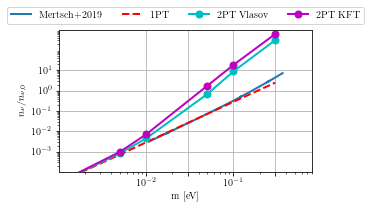

In [15]:
masses = np.array(masses)
lwidth=2

fig, ax = plt.subplots(1, 1, figsize=[5, 3])
ax.plot(mertsch['nfw'][:, 0]*1e-3, mertsch['nfw'][:, 1], '-', label=f"Mertsch+2019", lw=lwidth)
ax.plot(masses, first, 'r--', markersize=8, label='1PT', lw=lwidth)
ax.plot(masses, second_vlasov, 'c.-', markersize=14, label='2PT Vlasov', lw=lwidth)
ax.plot(masses, second_kft, 'm.-', markersize=14, label='2PT KFT', lw=lwidth)
ax.set(xlabel='m [eV]', ylabel=r'$n_\nu / n_{\nu,0}$', xscale='log', yscale='log', xlim=[1e-3, 8e-1], ylim=[1e-4, 1e+3], xticks=[1e-2, 3e-2, 1e-1, 3e-1], yticks=[1e-3, 1e-2, 1e-1, 1e-0, 1e+1])
ax.set(xlim=[min(masses), max(masses)])
ax.legend(frameon=True, bbox_to_anchor=(0.5, 1.1), ncol=4, loc='center')
ax.grid()
fig.subplots_adjust(bottom=0.2205, left=0.195)
fig.savefig('second.pdf')

### NB: Currently omitting the Kepler potential, i.e. only using NFW profile.